<a href="https://colab.research.google.com/github/akhildraju/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/LS_DS_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

In [1]:
### YOUR CODE STARTS HERE
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import style
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel, ttest_1samp

style.use('fivethirtyeight')


!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data








--2020-03-16 22:48:42--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-03-16 22:48:42 (287 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [2]:
df = pd.read_csv('house-votes-84.data',
                        header=None,
                         names=['party','handicapped-infants','water-project',
                                  'budget','physician-fee-freeze', 'el-salvador-aid',
                                  'religious-groups','anti-satellite-ban',
                                  'aid-to-contras','mx-missile','immigration',
                                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                                  'south-africa'])
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [3]:
df = df.replace({'?':np.NaN, 'n':0, 'y':1})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [4]:
rep = df[df.party == "republican"]
print(rep.shape)
print(rep.head())
dem = df[df.party == "democrat"]
print(dem.shape)
dem.head()

(168, 17)
         party  handicapped-infants  ...  duty-free  south-africa
0   republican                  0.0  ...        0.0           1.0
1   republican                  0.0  ...        0.0           NaN
7   republican                  0.0  ...        NaN           1.0
8   republican                  0.0  ...        0.0           1.0
10  republican                  0.0  ...        0.0           0.0

[5 rows x 17 columns]
(267, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [5]:
dem['physician-fee-freeze'].describe()

count    259.000000
mean       0.054054
std        0.226562
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: physician-fee-freeze, dtype: float64

In [6]:
rep['physician-fee-freeze'].describe()

count    165.000000
mean       0.987879
std        0.109760
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: physician-fee-freeze, dtype: float64

In [7]:
def mw(x):
         return(ttest_ind(rep[x], dem[x], nan_policy='omit'));
        
ax = ['handicapped-infants','water-project',
      'budget','physician-fee-freeze', 'el-salvador-aid',
      'religious-groups','anti-satellite-ban',
      'aid-to-contras','mx-missile','immigration',
      'synfuels', 'education', 'right-to-sue','crime','duty-free',
      'south-africa']
        
for i in ax:
  print(i)
  print(mw(i))

handicapped-infants
Ttest_indResult(statistic=-9.205264294809222, pvalue=1.613440327937243e-18)
water-project
Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)
budget
Ttest_indResult(statistic=-23.21277691701378, pvalue=2.0703402795404463e-77)
physician-fee-freeze
Ttest_indResult(statistic=49.36708157301406, pvalue=1.994262314074344e-177)
el-salvador-aid
Ttest_indResult(statistic=21.13669261173219, pvalue=5.600520111729011e-68)
religious-groups
Ttest_indResult(statistic=9.737575825219457, pvalue=2.3936722520597287e-20)
anti-satellite-ban
Ttest_indResult(statistic=-12.526187929077842, pvalue=8.521033017443867e-31)
aid-to-contras
Ttest_indResult(statistic=-18.052093200819733, pvalue=2.82471841372357e-54)
mx-missile
Ttest_indResult(statistic=-16.437503268542994, pvalue=5.03079265310811e-47)
immigration
Ttest_indResult(statistic=1.7359117329695164, pvalue=0.08330248490425066)
synfuels
Ttest_indResult(statistic=-8.293603989407588, pvalue=1.5759322301054064e-15)
educa

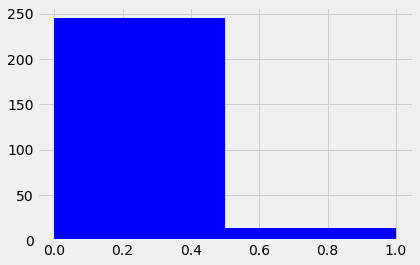

In [8]:
dem['physician-fee-freeze'].hist(bins=2, color='b');


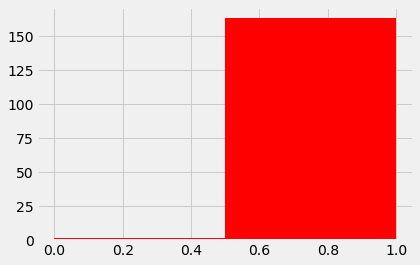

In [9]:
rep['physician-fee-freeze'].hist(bins=2, color='r')

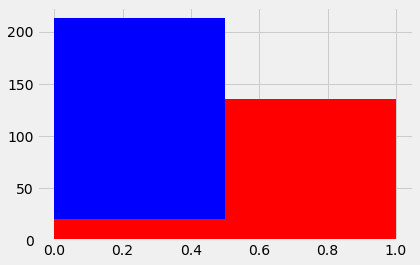

In [10]:
dem['education'].hist(bins=2, color='b');
rep['education'].hist(bins=2, color='r');

## Stretch Goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Work on Performing a T-test without using Scipy in order to get "under the hood" and learn more thoroughly about this topic.
### Start with a 1-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://blog.minitab.com/hs-fs/hubfs/Imported_Blog_Media/701f9c0efa98a38fb397f3c3ec459b66.png?width=247&height=172&name=701f9c0efa98a38fb397f3c3ec459b66.png) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Then try a 2-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://lh3.googleusercontent.com/proxy/rJJ5ZOL9ZDvKOOeBihXoZDgfk7uv1YsRzSQ1Tc10RX-r2HrRpRLVqlE9CWX23csYQXcTniFwlBg3H-qR8MKJPBGnjwndqlhDX3JxoDE5Yg) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Then check your Answers using Scipy!